<a href="https://colab.research.google.com/github/Kzzrll/HMM3/blob/main/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%8D%D1%84%D1%84%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%B2_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B8_%D0%B4%D0%B8%D1%81%D0%B1%D0%B0%D0%BB%D0%B0%D0%BD%D1%81%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BD%D0%B0_%D1%81%D0%B8%D0%BD%D1%82%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%BD%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование эффективности методов обработки дисбаланса данных на синтетических наборах


Исследуем уровень дисбаланса 10.0% миноритарного класса...
Исходное распределение классов для повторения 1: Counter({np.int64(0): 7175, np.int64(1): 825})
Исходное распределение классов для повторения 2: Counter({np.int64(0): 7161, np.int64(1): 839})
Исходное распределение классов для повторения 3: Counter({np.int64(0): 7165, np.int64(1): 835})
Исходное распределение классов для повторения 4: Counter({np.int64(0): 7173, np.int64(1): 827})
Исходное распределение классов для повторения 5: Counter({np.int64(0): 7168, np.int64(1): 832})
Исходное распределение классов для повторения 6: Counter({np.int64(0): 7163, np.int64(1): 837})
Исходное распределение классов для повторения 7: Counter({np.int64(0): 7172, np.int64(1): 828})
Исходное распределение классов для повторения 8: Counter({np.int64(0): 7164, np.int64(1): 836})
Исходное распределение классов для повторения 9: Counter({np.int64(0): 7166, np.int64(1): 834})
Исходное распределение классов для повторения 10: Counter({np.int64(0): 7171

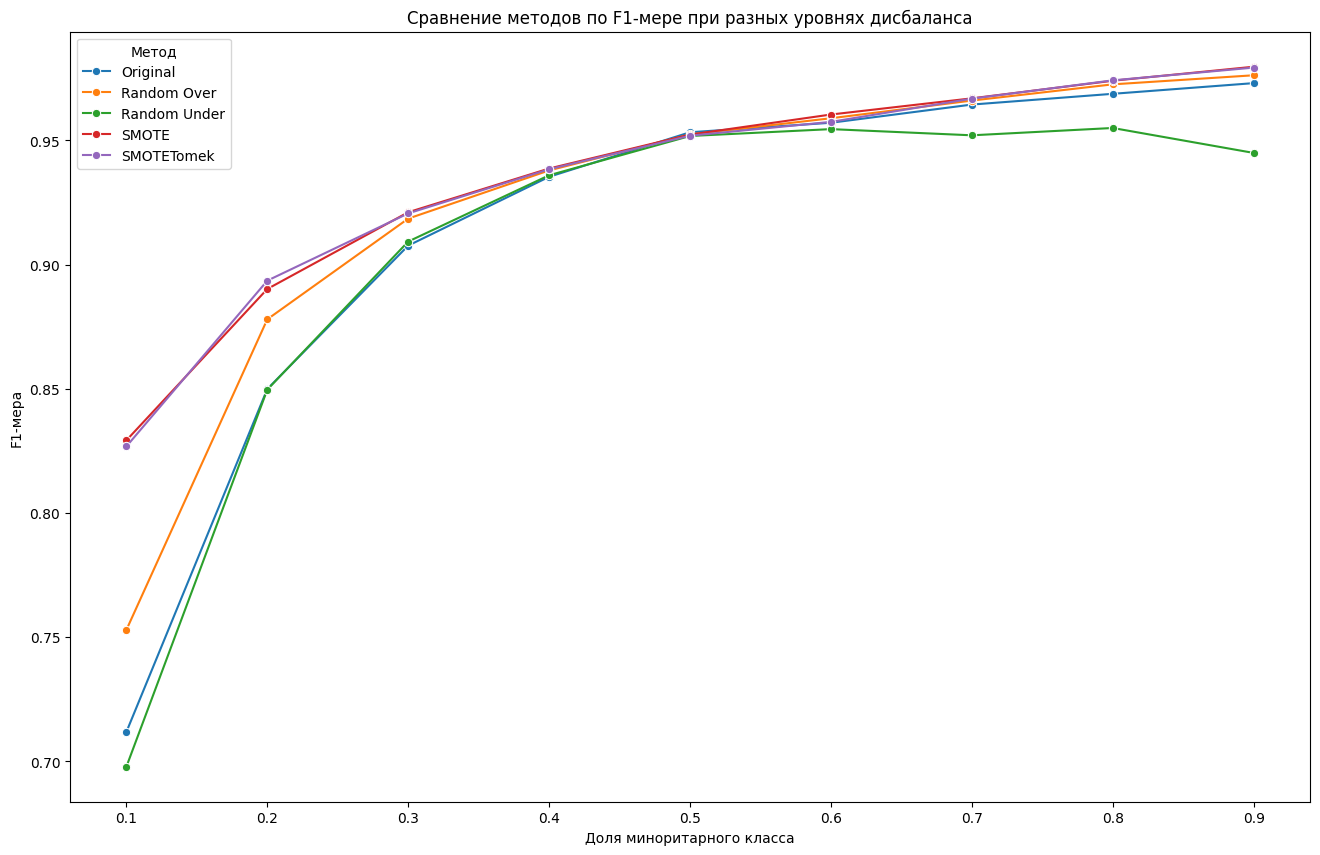


Лучший метод для уровня дисбаланса 10.0%: SMOTE
Repeat       4.500000
Accuracy     0.966300
ROC_AUC      0.967833
Precision    0.874317
Recall       0.789367
F1           0.829235
dtype: float64

Лучший метод для уровня дисбаланса 20.0%: SMOTETomek
Repeat       4.500000
Accuracy     0.957450
ROC_AUC      0.980378
Precision    0.907617
Recall       0.880245
F1           0.893530
dtype: float64

Лучший метод для уровня дисбаланса 30.0%: SMOTE
Repeat       4.500000
Accuracy     0.952900
ROC_AUC      0.984409
Precision    0.931682
Recall       0.910921
F1           0.921069
dtype: float64

Лучший метод для уровня дисбаланса 40.0%: SMOTE
Repeat       4.500000
Accuracy     0.951350
ROC_AUC      0.985735
Precision    0.947936
Recall       0.929791
F1           0.938679
dtype: float64

Лучший метод для уровня дисбаланса 50.0%: Original
Repeat       4.500000
Accuracy     0.953400
ROC_AUC      0.986362
Precision    0.956066
Recall       0.950606
F1           0.953276
dtype: float64

Лучший мето

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Уровни дисбаланса, которые будем исследовать
disbalance_levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Количество повторений для каждого уровня дисбаланса
n_repeats = 10

# Общий список результатов для всех экспериментов
all_results = []

for disbalance in disbalance_levels:
    print(f"\nИсследуем уровень дисбаланса {disbalance * 100}% миноритарного класса...")

    results = []
    for repeat in range(n_repeats):
        # Генерация синтетических данных с заданным дисбалансом
        X, y = make_classification(
            n_samples=10000,
            n_features=20,
            n_informative=15,
            n_redundant=5,
            n_classes=2,
            weights=[1 - disbalance, disbalance],  # Задаём нужный дисбаланс
            random_state=repeat  # Меняем seed для каждой итерации
        )

        # Разделение на train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Баланс классов до обработки
        print(f"Исходное распределение классов для повторения {repeat + 1}:", Counter(y_train))

        # Методы обработки дисбаланса
        resampling_methods = {
            'Original': None,
            'Random Over': RandomOverSampler(random_state=42),
            'SMOTE': SMOTE(random_state=42),
            'Random Under': RandomUnderSampler(random_state=42),
            'SMOTETomek': SMOTETomek(random_state=42)
        }

        for name, method in resampling_methods.items():
            # Применение метода ресемплинга
            if method:
                X_res, y_res = method.fit_resample(X_train, y_train)
            else:
                X_res, y_res = X_train, y_train

            # Обучение модели
            model = RandomForestClassifier(random_state=42)
            model.fit(X_res, y_res)

            # Предсказания
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)[:, 1]

            # Сбор метрик
            accuracy = model.score(X_test, y_test)
            roc_auc = roc_auc_score(y_test, y_proba)
            report = classification_report(y_test, y_pred, output_dict=True)

            results.append({
                'Disbalance': disbalance,
                'Repeat': repeat,
                'Method': name,
                'Accuracy': accuracy,
                'ROC_AUC': roc_auc,
                'Precision': report['1']['precision'],
                'Recall': report['1']['recall'],
                'F1': report['1']['f1-score']
            })

    # Добавляем результаты текущего уровня дисбаланса в общий список
    all_results.extend(results)

# Преобразуем все результаты в DataFrame
all_results_df = pd.DataFrame(all_results)

# Выводим средние значения метрик для каждого метода и уровня дисбаланса
summary_df = all_results_df.groupby(['Disbalance', 'Method']).mean().reset_index()
print(summary_df)

# Визуализация результатов
plt.figure(figsize=(16, 10))
sns.lineplot(data=summary_df, x='Disbalance', y='F1', hue='Method', marker='o')
plt.title('Сравнение методов по F1-мере при разных уровнях дисбаланса')
plt.xlabel('Доля миноритарного класса')
plt.ylabel('F1-мера')
plt.xticks(disbalance_levels)
plt.legend(title='Метод')
plt.show()

# Детальный отчёт по лучшему методу для каждого уровня дисбаланса
for disbalance in disbalance_levels:
    best_method = summary_df[summary_df['Disbalance'] == disbalance].sort_values('F1', ascending=False).iloc[0]['Method']
    print(f"\nЛучший метод для уровня дисбаланса {disbalance * 100}%: {best_method}")
    detail_report = all_results_df[(all_results_df['Disbalance'] == disbalance) & (all_results_df['Method'] == best_method)]
    print(detail_report[['Repeat', 'Accuracy', 'ROC_AUC', 'Precision', 'Recall', 'F1']].mean())
